In [105]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import difflib
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

In [41]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import config
#Initialize SpotiPy with user credentials IMPORT FROM CONFIG.PY
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [42]:
df = pd.read_csv ('all_songs.csv')

### Id as index, we need to keep it later

In [43]:
df = df.set_index('id')

In [44]:
df.columns

Index(['Unnamed: 0', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [45]:
#df = df.drop(['key','type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms','time_signature'],axis=1)
X = df.drop(['Unnamed: 0','mode','key','type', 'uri', 'track_href', 'analysis_url', 'duration_ms','time_signature'], axis=1)

In [46]:
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,
3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,-6.839,0.0321,0.7310,0.00000,0.1890,0.557,95.263
2PzU4IB8Dr6mxV3lHuaG34,0.723,0.863,-7.890,0.0338,0.0383,0.03170,0.1280,0.931,136.302
7pKfPomDEeI4TPT6EOYjn9,0.547,0.257,-12.358,0.0252,0.9070,0.18300,0.0935,0.169,75.752
54X78diSLoUDI3joC2bjMz,0.367,0.452,-10.422,0.0307,0.0353,0.00228,0.6890,0.189,113.066
3Um9toULmYFGCpvaIPFw7l,0.283,0.716,-9.632,0.0986,0.4470,0.00000,0.3990,0.828,201.960


## Scaling features

In [47]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [48]:
X_scaled 

array([[-8.45202325e-01,  1.93755566e-01,  2.66600005e-01, ...,
        -1.90630031e-03, -1.43044300e-02, -1.04452596e+00],
       [ 6.83813066e-01,  8.92238260e-01, -1.20399978e-02, ...,
        -3.82152267e-01,  1.47998966e+00,  5.51796635e-01],
       [-4.32812282e-01, -2.08861042e+00, -1.19659141e+00, ...,
        -5.97209412e-01, -1.56453466e+00, -1.80345893e+00],
       ...,
       [ 1.07082526e+00, -7.01482817e-01, -8.04406835e-02, ...,
        -9.51274509e-01,  5.45056994e-01,  4.60814922e-01],
       [-1.30200360e+00, -3.11419945e+00, -1.61017695e+00, ...,
        -5.06823076e-01, -1.25289044e+00,  6.16677994e-01],
       [ 1.51493761e+00, -3.74323684e-02,  7.81726099e-01, ...,
        -5.50457859e-01,  1.02850508e+00,  1.45043416e-01]])

### create a dataframe with this array, with column and index from the df without scaled

In [49]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns, index=X.index)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,
3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,-6.839,0.0321,0.7310,0.00000,0.1890,0.557,95.263
2PzU4IB8Dr6mxV3lHuaG34,0.723,0.863,-7.890,0.0338,0.0383,0.03170,0.1280,0.931,136.302
7pKfPomDEeI4TPT6EOYjn9,0.547,0.257,-12.358,0.0252,0.9070,0.18300,0.0935,0.169,75.752
54X78diSLoUDI3joC2bjMz,0.367,0.452,-10.422,0.0307,0.0353,0.00228,0.6890,0.189,113.066
3Um9toULmYFGCpvaIPFw7l,0.283,0.716,-9.632,0.0986,0.4470,0.00000,0.3990,0.828,201.960


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,
3AhXZa8sUQht0UEdBJgpGc,-0.845202,0.193756,0.266600,-0.574376,1.948083,-0.451203,-0.001906,-0.014304,-1.044526
2PzU4IB8Dr6mxV3lHuaG34,0.683813,0.892238,-0.012040,-0.551084,-0.701434,-0.330474,-0.382152,1.479990,0.551797
7pKfPomDEeI4TPT6EOYjn9,-0.432812,-2.088610,-1.196591,-0.668913,2.621267,0.245750,-0.597209,-1.564535,-1.803459
54X78diSLoUDI3joC2bjMz,-1.574815,-1.129426,-0.683321,-0.593557,-0.712909,-0.442520,3.114864,-1.484626,-0.352030
3Um9toULmYFGCpvaIPFw7l,-2.107750,0.169161,-0.473877,0.336740,0.861807,-0.451203,1.307137,1.068459,3.105742


In [50]:
X_scaled_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.041900e+04,1.041900e+04,1.041900e+04,1.041900e+04,1.041900e+04,1.041900e+04,1.041900e+04,1.041900e+04,1.041900e+04
mean,3.143021e-16,-5.870521e-16,1.111182e-16,-8.897888e-17,-1.313854e-17,-6.021311e-15,-1.072715e-16,9.770048e-16,2.263842e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-3.516221e+00,-3.315579e+00,-6.036868e+00,-7.100157e-01,-8.479227e-01,-4.512033e-01,-1.117897e+00,-2.125494e+00,-2.860465e+00
25%,-6.485240e-01,-6.375372e-01,-5.561966e-01,-5.332729e-01,-7.813751e-01,-4.512033e-01,-6.252603e-01,-7.794309e-01,-7.288128e-01
50%,8.108916e-02,1.691611e-01,2.053575e-01,-3.702312e-01,-4.501376e-01,-4.506359e-01,-4.008529e-01,4.962259e-02,4.243129e-02
75%,7.472577e-01,7.889415e-01,7.281721e-01,3.531801e-02,4.984407e-01,-3.533251e-01,3.347049e-01,8.367240e-01,4.299885e-01
max,2.365096e+00,1.561208e+00,2.435538e+00,1.170034e+01,2.957860e+00,3.342053e+00,5.016094e+00,1.723711e+00,3.659178e+00


## Clustering with K-Means

In [51]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [52]:
kmeans.labels_

array([0, 2, 0, ..., 2, 0, 2], dtype=int32)

In [53]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
labels
# retrieve unique clusters
clusters = np.unique(labels)
clusters

array([0, 1, 2, 3, 4, 5], dtype=int32)

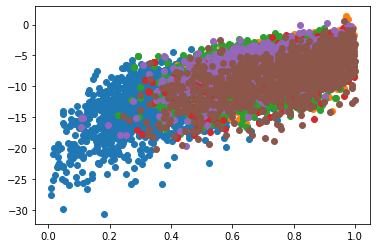

In [54]:
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 2])
plt.show()

In [55]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1793
1    2469
2    3598
3     691
4     781
5    1087
dtype: int64

In [56]:
# Cluster number 3 and 4 have the lowest 

### Create new df with new column with the clusters

In [57]:
X_scaled_df_clusters = X_scaled_df
X_scaled_df_clusters["cluster"] = clusters

In [58]:
X_scaled_df_clusters.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
id,,,,,,,,,,
3AhXZa8sUQht0UEdBJgpGc,-0.845202,0.193756,0.266600,-0.574376,1.948083,-0.451203,-0.001906,-0.014304,-1.044526,0
2PzU4IB8Dr6mxV3lHuaG34,0.683813,0.892238,-0.012040,-0.551084,-0.701434,-0.330474,-0.382152,1.479990,0.551797,2
7pKfPomDEeI4TPT6EOYjn9,-0.432812,-2.088610,-1.196591,-0.668913,2.621267,0.245750,-0.597209,-1.564535,-1.803459,0
54X78diSLoUDI3joC2bjMz,-1.574815,-1.129426,-0.683321,-0.593557,-0.712909,-0.442520,3.114864,-1.484626,-0.352030,3
3Um9toULmYFGCpvaIPFw7l,-2.107750,0.169161,-0.473877,0.336740,0.861807,-0.451203,1.307137,1.068459,3.105742,3


In [59]:
X_scaled_df["cluster"] = clusters
X_scaled_df = X_scaled_df.drop("cluster",axis=1)

- Now we have 3 dataframes:
    - X
    - X_scaled_df -- TO FIT THE MODEL
    - X_scaled_df_clusters

In [60]:
X_scaled_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,
3AhXZa8sUQht0UEdBJgpGc,-0.845202,0.193756,0.266600,-0.574376,1.948083,-0.451203,-0.001906,-0.014304,-1.044526
2PzU4IB8Dr6mxV3lHuaG34,0.683813,0.892238,-0.012040,-0.551084,-0.701434,-0.330474,-0.382152,1.479990,0.551797
7pKfPomDEeI4TPT6EOYjn9,-0.432812,-2.088610,-1.196591,-0.668913,2.621267,0.245750,-0.597209,-1.564535,-1.803459
54X78diSLoUDI3joC2bjMz,-1.574815,-1.129426,-0.683321,-0.593557,-0.712909,-0.442520,3.114864,-1.484626,-0.352030
3Um9toULmYFGCpvaIPFw7l,-2.107750,0.169161,-0.473877,0.336740,0.861807,-0.451203,1.307137,1.068459,3.105742


In [61]:
X_scaled_df_clusters.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
id,,,,,,,,,,
3AhXZa8sUQht0UEdBJgpGc,-0.845202,0.193756,0.266600,-0.574376,1.948083,-0.451203,-0.001906,-0.014304,-1.044526,0
2PzU4IB8Dr6mxV3lHuaG34,0.683813,0.892238,-0.012040,-0.551084,-0.701434,-0.330474,-0.382152,1.479990,0.551797,2
7pKfPomDEeI4TPT6EOYjn9,-0.432812,-2.088610,-1.196591,-0.668913,2.621267,0.245750,-0.597209,-1.564535,-1.803459,0
54X78diSLoUDI3joC2bjMz,-1.574815,-1.129426,-0.683321,-0.593557,-0.712909,-0.442520,3.114864,-1.484626,-0.352030,3
3Um9toULmYFGCpvaIPFw7l,-2.107750,0.169161,-0.473877,0.336740,0.861807,-0.451203,1.307137,1.068459,3.105742,3


### Heatmap

In [62]:
hm= X_scaled_df_clusters.groupby(["cluster"]).mean()
hm

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,
0,-0.632365,-1.537651,-1.244525,-0.402676,1.419779,-0.062203,-0.207580,-0.565685,-0.261774
1,-0.626297,0.488046,0.511211,-0.199551,-0.528692,-0.338593,-0.122541,-0.556679,0.451209
2,0.605184,0.196666,0.182738,-0.225925,-0.150972,-0.378929,-0.280894,0.745982,-0.253873
3,-0.376612,0.406549,0.197138,-0.009721,-0.113833,-0.184456,2.742078,0.039351,0.053398
4,0.658021,0.173230,0.385985,2.829169,-0.134958,-0.350691,-0.018491,0.137221,-0.011228
5,0.229095,0.393928,-0.115837,-0.161267,-0.472003,2.495174,-0.179330,-0.395298,0.221371


<AxesSubplot:ylabel='cluster'>

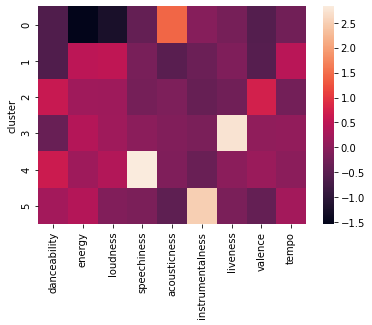

In [63]:
sns.heatmap(hm)

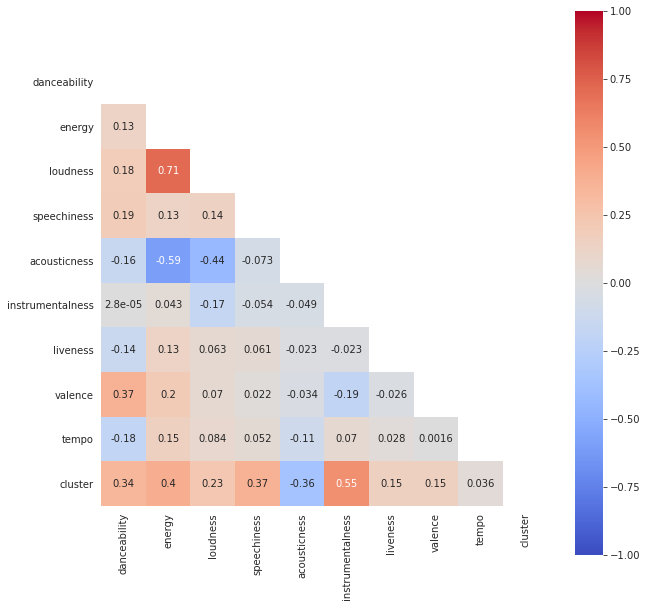

In [64]:
corr = X_scaled_df_clusters.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [65]:
X_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,
3AhXZa8sUQht0UEdBJgpGc,-0.845202,0.193756,0.266600,-0.574376,1.948083,-0.451203,-0.001906,-0.014304,-1.044526
2PzU4IB8Dr6mxV3lHuaG34,0.683813,0.892238,-0.012040,-0.551084,-0.701434,-0.330474,-0.382152,1.479990,0.551797
7pKfPomDEeI4TPT6EOYjn9,-0.432812,-2.088610,-1.196591,-0.668913,2.621267,0.245750,-0.597209,-1.564535,-1.803459
54X78diSLoUDI3joC2bjMz,-1.574815,-1.129426,-0.683321,-0.593557,-0.712909,-0.442520,3.114864,-1.484626,-0.352030
3Um9toULmYFGCpvaIPFw7l,-2.107750,0.169161,-0.473877,0.336740,0.861807,-0.451203,1.307137,1.068459,3.105742
...,...,...,...,...,...,...,...,...,...
2Rk4JlNc2TPmZe2af99d45,-0.033111,0.729915,0.991435,-0.231851,-0.721706,-0.451203,-0.444488,0.668916,2.335645
0nhBKubnVz9yFNNprBniWz,0.081089,0.272458,0.903416,-0.452437,-0.608872,-0.451203,-0.695699,0.125536,-1.190626
0WOvSEVpUGkNufX0w0M06F,1.070825,-0.701483,-0.080441,-0.153756,1.791261,-0.451137,-0.951275,0.545057,0.460815


## Playing with parameters

In [66]:
kmeans.inertia_

52035.02384360335

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

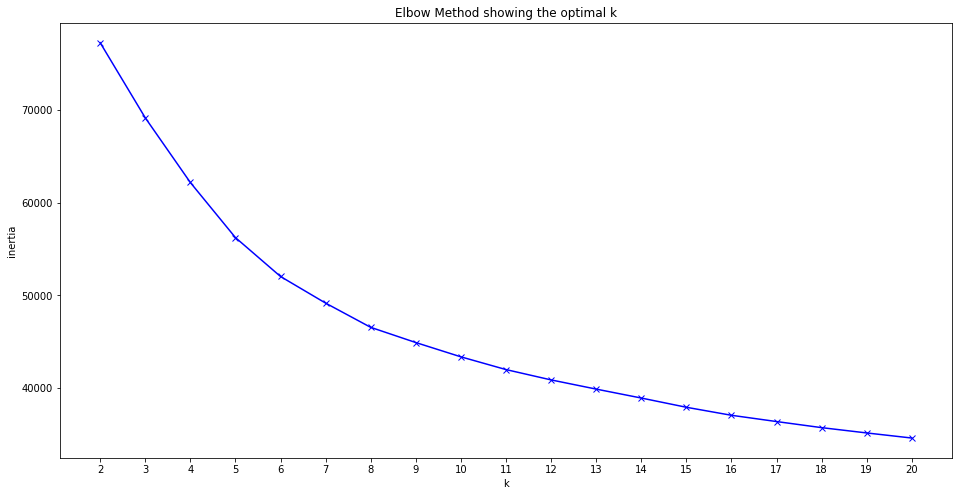

In [67]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Elbow doesn't says a lot here because it doesn't change a lot. Let's check silouhette

## Silouhette

- Checking K means from 2 to 20 and save it as pickle file on "kmeans" folder

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

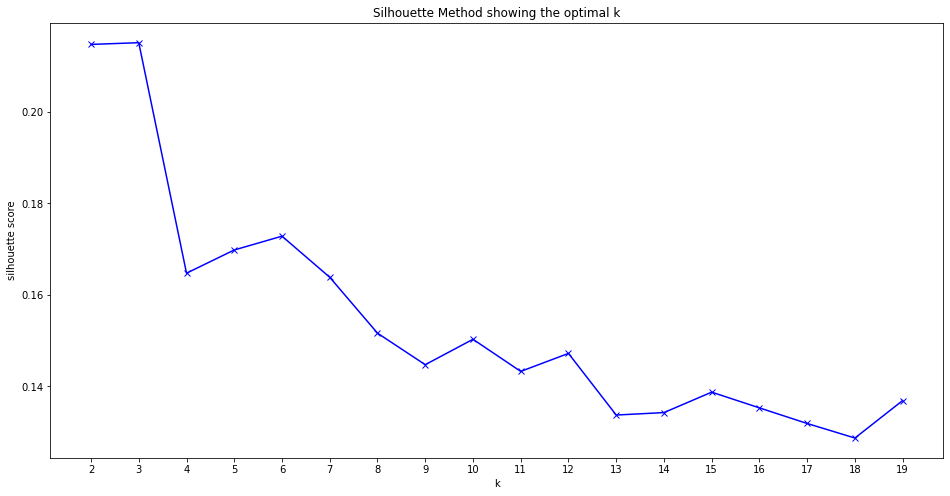

In [68]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans/kmeans_" + str(k) + ".pickle"    #SAVING ALL THE MODELS I TRY ON HARD DISK
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

#### I would say 6,10 and 12 are the best 8(it does not make sense just 3 clusters)

### Saving with pickle

- Save the freshly trained standard scaler with pickle
- Save number of kmeans we think are the best one

In [69]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("kmeans/scaler.pickle", "wb") as f:  
    pickle.dump(scaler,f)

#with open("kmeans/kmeans_6.pickle", "wb") as f:    pickle.dump(kmeans,f)#

### How to load them

In [70]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [71]:
scaler2 = load("kmeans/scaler.pickle")
scaler2

StandardScaler()

In [72]:
kmeans6 = load("kmeans/kmeans_6.pickle")
kmeans6

KMeans(n_clusters=6, random_state=1234)

In [73]:
import random
from IPython.display import IFrame

## Prediction function

In [76]:
def give_me_audio_features (song):

    results = sp.search(song,limit=1,market="GB")
    song_id = results['tracks']['items'][0]['id']
    feat = sp.audio_features(results["tracks"]["items"][0]["id"])
    df= pd.json_normalize(feat)
    df = df.set_index('id')
    df = df.drop(['mode','key','type', 'uri', 'track_href', 'analysis_url', 'duration_ms','time_signature'], axis=1)
    df_scaled = scaler.transform(df)
    cluster_number = kmeans6.predict(df_scaled)[0]   #we have an array with number of the cluster pred inside, just give me
    recom = X_scaled_df_clusters[X_scaled_df_clusters.cluster== cluster_number]  #filter our database with this number of cluster
    index_list = recom.index.values.tolist() #after filter, give me ID (which are on index)
    track_id = random.choice(index_list)  #choose one
    show_recom = IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
    return show_recom

In [82]:
scaler

StandardScaler()

### One song prediction

In [77]:
give_me_audio_features("London Calling")

In [ ]:
df_song = give_me_audio_features ("London Calling")
df_song

In [80]:
kmeans6

KMeans(n_clusters=6, random_state=1234)

- We've predicted that it belongs to cluster 2

- Go to X_scaled_df_clusters and give me a recommendation

In [84]:
recom = X_scaled_df_clusters[X_scaled_df_clusters.cluster==2]
recom.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
id,,,,,,,,,,
2PzU4IB8Dr6mxV3lHuaG34,0.683813,0.892238,-0.012040,-0.551084,-0.701434,-0.330474,-0.382152,1.479990,0.551797,2
7s25THrKz86DM225dOYwnr,1.204059,-0.608024,0.694237,-0.452437,-0.220643,-0.451120,-0.839694,1.615835,-0.278747,2
0GTK6TesV108Jj5D3MHsYb,0.817047,0.572510,0.494072,-0.515462,-0.178569,-0.437226,0.440675,1.316177,0.114548,2
2QfiRTz5Yc8DdShCxG1tB2,-0.515290,0.597105,-0.340522,0.003806,1.986332,-0.450972,0.733651,1.631816,1.784115,2
14XWXWv5FoCbFzLksawpEe,-0.413779,0.198674,-1.029832,-0.626440,0.108300,-0.402074,-0.494356,0.620970,-0.709111,2


In [85]:
index_list = recom.index.values.tolist()
index_list

['2PzU4IB8Dr6mxV3lHuaG34',
 '7s25THrKz86DM225dOYwnr',
 '0GTK6TesV108Jj5D3MHsYb',
 '2QfiRTz5Yc8DdShCxG1tB2',
 '14XWXWv5FoCbFzLksawpEe',
 '1Dv8LlG8o8zPDqOV7PUUp0',
 '5jzma6gCzYtKB1DbEwFZKH',
 '2grjqo0Frpf2okIBiifQKs',
 '6Ac4NVYYl2U73QiTt11ZKd',
 '3SQhmctWreNM0X6Zkm2K5R',
 '2WfaOiMkCvy7F5fcp2zZ8L',
 '254bXAqt3zP6P50BdQvEsq',
 '36umtbUVPKxlgJzKcrQIwI',
 '1WN4uNclrDuczTO3bCr8s1',
 '25OUeDZIDX1UIQlsrWcCgc',
 '3GfOAdcoc3X5GPiiXmpBjK',
 '6yllGc1Gnh17PnpmC1hrki',
 '2EB1aFLWC4uIfld5Z3Yj1z',
 '19jo0UT2vqD4pNVfIqTy4R',
 '0Anb7B9hNq5yXUAy4DBLLU',
 '6H3kDe7CGoWYBabAeVWGiD',
 '62LJFaYihsdVrrkgUOJC05',
 '6YrHQ3Uv9YXK2gJNVTlT8P',
 '184QpO8ZchGncbNyJe9SDT',
 '50RwvvEKX5Q7AZt8FTAwIF',
 '0P7DoyGrr4Wp9w5TotEtUC',
 '2iXcvnD3d1gfLBum0cE5Eg',
 '2H7PHVdQ3mXqEHXcvclTB0',
 '5haXbSJqjjM0TCJ5XkfEaC',
 '6JymsaWDHk2Yj4e0yNBIFH',
 '0iA3xXSkSCiJywKyo1UKjQ',
 '23NPGXlSaIqWzvxIRhM2oG',
 '5ChkMS8OtdzJeqyybCc9R5',
 '6uNSPeniN037HeHsAX9Rxg',
 '1qRA5BS78u3gME0loMl9AA',
 '452KBpASS5lZLeJWX9Ixub',
 '0G3fbPbE1vGeABDEZF0jeG',
 

In [86]:
import random
random.choice(index_list)

'0Uqs7ilt5kGX9NzFDWTBrP'

In [87]:
from IPython.display import IFrame

track_id = "3iMLRCGHLQ135LtMjKLkO8"

IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [98]:
enter_song = input('Enter a song: ')
def give_me_audio_features (song):

    results = sp.search(song,limit=1,market="GB")
    song_id = results['tracks']['items'][0]['id']
    feat = sp.audio_features(results["tracks"]["items"][0]["id"])
    df= pd.json_normalize(feat)
    df = df.set_index('id')
    df = df.drop(['mode','key','type', 'uri', 'track_href', 'analysis_url', 'duration_ms','time_signature'], axis=1)
    df_scaled = scaler.transform(df)
    cluster_number = kmeans6.predict(df_scaled)[0]   #we have an array with number of the cluster pred inside, just give me
    recom = X_scaled_df_clusters[X_scaled_df_clusters.cluster== cluster_number]  #filter our database with this number of cluster
    index_list = recom.index.values.tolist() #after filter, give me ID (which are on index)
    track_id = random.choice(index_list)  #choose one
    show_recom = IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
    return show_recom
give_me_audio_features(enter_song)

KeyboardInterrupt: Interrupted by user

## PREDICTION USING ALSO BILLBOARD

In [99]:
df = pd.read_csv('scraping_billboard.csv',index_col=[0])
title_list = df['title'].tolist()

In [100]:
give_me_audio_features('lose yourself')

In [106]:
enter_song = input('Enter a song you like: ').lower()   #we need the name in lowercase, as we have on our data
possibilities = title_list
n = 1   
cutoff = 0.7
close_matches_song = difflib.get_close_matches(enter_song, 
                possibilities, n, cutoff)

if len(df.loc[df['title'] == enter_song ])==1:       #just 1 song with the same name
    hot_song= random.choice(title_list)
    print("I would recommend: " + hot_song)

elif len(df.loc[df['title'] == enter_song ]) > 1:     #we have more than 1 song with same name
    artist_name = input('What is the name of the artist?: ').lower()
    if artist_name in df['artist'].values:
        hot_song= random.choice(title_list)
        print("I would recommend: " + hot_song)
    else: 
        print("Sorry, I don't know this song")

else:                                                #we don't have it
    if len(close_matches_song) > 0:
        suggestion = input("Do you mean " + "-" + close_matches_song + "-" + "?")
        if suggestion == "yes":
            hot_song= random.choice(title_list)
            print("I would recommend: " + hot_song.capitalize())
        else:
            give_me_audio_features (enter_song)
           
   

Enter a song you like: despacito


## BASIC FUNCTION BUT WORKING

In [121]:
def recommender2():
    enter_song = input('Enter a song you like: ').lower()   
    if len(df.loc[df['title'] == enter_song ])==1:       #I have one song with same title on df
        hot_song= random.choice(title_list)
        print("I would recommend: " + hot_song)


    else:  
        print("This song is not in Billboard top 100,let's find something similar on Spotify")  
        return give_me_audio_features (enter_song)
           

In [125]:
recommender2()

Enter a song you like: the bells
This song is not in Billboard top 100,let's find something similar on Spotify


In [ ]:
def recommender2():
    enter_song = input('Enter a song you like: ').lower()   
    if len(df.loc[df['title'] == enter_song ])==1:       #I have one song with same title on df
        hot_song= random.choice(title_list)
        print("I would recommend: " + hot_song)


    else:  
        print("This song is not in Billboard top 100,let's find something similar on Spotify")  
        return give_me_audio_features (enter_song)

## ONE STEP MORE

In [117]:
def recommender3():
    enter_song = input('Enter a song you like: ').lower()
    possibilities = title_list
    n = 1   
    cutoff = 0.7
    close_matches_song = difflib.get_close_matches(enter_song, 
                possibilities, n, cutoff)
    
    if len(df.loc[df['title'] == enter_song ])==1:       #I have one song with same title on df
        hot_song= random.choice(title_list)
        print("I would recommend: " + hot_song.capitalize())
    else:                                                
        suggestion = input("Do you mean " + "-" + close_matches_song + "-" + "?")
        if suggestion == "yes":
            hot_song= random.choice(title_list)
            return print("I would recommend: " + hot_song.capitalize())
        else:
            print("This song is not in Billboard top 100,let's find something similar on Spotify")  
            return give_me_audio_features (enter_song)

In [123]:
recommender3()

Enter a song you like: despacito


TypeError: can only concatenate str (not "list") to str

## TRYING TO DEAL WITH TYPOS

In [112]:
def recommender():
    
    enter_song = input('Enter a song you like: ').lower()   #we need the name in lowercase, as we have on our data
    possibilities = title_list
    n = 1   
    cutoff = 0.7
    close_matches_song = difflib.get_close_matches(enter_song, 
                possibilities, n, cutoff)

    if len(df.loc[df['title'] == enter_song ])==1:       #just 1 song with the same name
        hot_song= random.choice(title_list)
        return print("I would recommend: " + hot_song)

    elif len(df.loc[df['title'] == enter_song ]) > 1:     #we have more than 1 song with same name
        artist_name = input('What is the name of the artist?: ').lower()
        if artist_name in df['artist'].values:
            hot_song= random.choice(title_list)
            return print("I would recommend: " + hot_song)
        else: 
            return print("Sorry, I don't know this song")

    else:                                                #we don't have it
        if len(close_matches_song) > 0:
            suggestion = input("Do you mean " + "-" + close_matches_song[0] + "-" + "?")
            if suggestion == "yes":
                hot_song= random.choice(title_list)
                return print("I would recommend: " + hot_song.capitalize())
            else:
                print("I can't find it, try again with another one")  
                enter_song2 = input('Enter a song you like: ').lower()
                if len(df.loc[df['title'] == enter_song2 ])==1:       #just 1 song with the same name
                    hot_song= random.choice(title_list)
                    return print("I would recommend: " + hot_song)

                elif len(df.loc[df['title'] == enter_song2 ]) > 1:     #we have more than 1 song with same name
                    artist_name = input('What is the name of the artist?: ').lower()
                    if artist_name in df['artist'].values:
                        hot_song= random.choice(title_list)
                        return print("I would recommend: " + hot_song)
                    else: 
                        return print("Sorry, I don't know this song")
                
        else:
            print("This song is not in Billboard top 100, let's find something similar on Spotify")  
            return give_me_audio_features (enter_song)
           
   
    

In [113]:
recommender()

Enter a song you like: enem
Do you mean -enemy-?no
I can't find it, try again with another one
Enter a song you like: blue monday


In [ ]:
def recommender():
    
    enter_song = input('Enter a song you like: ').lower()   #we need the name in lowercase, as we have on our data
    possibilities = title_list
    n = 1   
    cutoff = 0.7
    close_matches_song = difflib.get_close_matches(enter_song, 
                possibilities, n, cutoff)

    if len(df.loc[df['title'] == enter_song ])==1:       #just 1 song with the same name
        hot_song= random.choice(title_list)
        return print("I would recommend: " + hot_song)

    elif len(df.loc[df['title'] == enter_song ]) > 1:     #we have more than 1 song with same name
        artist_name = input('What is the name of the artist?: ').lower()
        if artist_name in df['artist'].values:
            hot_song= random.choice(title_list)
            return print("I would recommend: " + hot_song)
        else: 
            return print("Sorry, I don't know this song")

    else:                                                #we don't have it
        if len(close_matches_song) > 0:
            suggestion = input("Do you mean " + "-" + close_matches_song[0] + "-" + "?")
            if suggestion == "yes":
                hot_song= random.choice(title_list)
                return print("I would recommend: " + hot_song.capitalize())
            else:
                print("I can't find it, try again with another one")  
                enter_song2 = input('Enter a song you like: ').lower()
                print(enter_song2)

In [ ]:
recommender()

## FINDING ARTIST

In [ ]:
enter_song = input('Enter a song: ')
def give_me_audio_features (song):

    results = sp.search(song,limit=1,market="GB")
    song_id = results['tracks']['items'][0]['id']
    feat = sp.audio_features(results["tracks"]["items"][0]["id"])
    df= pd.json_normalize(feat)
    df = df.set_index('id')
    df = df.drop(['mode','key','type', 'uri', 'track_href', 'analysis_url', 'duration_ms','time_signature'], axis=1)
    df_scaled = scaler.transform(df)
    cluster_number = kmeans6.predict(df_scaled)[0]   #we have an array with number of the cluster pred inside, just give me
    recom = X_scaled_df_clusters[X_scaled_df_clusters.cluster== cluster_number]  #filter our database with this number of cluster
    index_list = recom.index.values.tolist() #after filter, give me ID (which are on index)
    track_id = random.choice(index_list)  #choose one
    show_recom = IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
    return show_recom
give_me_audio_features(enter_song)

In [153]:
results = sp.search("umbrella",limit=2,market="GB")

In [134]:
song_id = results['tracks']['items']
len(song_id)

2

In [144]:
artist1=results['tracks']['items'][0]["artists"][0]["name"]
artist1

'Rihanna'

In [152]:
artist2=results['tracks']['items'][0]["artists"][1]["name"]
artist2

'JAY-Z'

In [161]:
def recommender5():
    enter_song = input('Enter a song you like: ').lower() 
    if len(df.loc[df['title'] == enter_song ])==1:       #I have one song with same title on df
        hot_song= random.choice(title_list)
        print("I would recommend: " + hot_song)
        
    else:  
        results = sp.search("enter_song",limit=2,market="GB")
        artist1=results['tracks']['items'][0]["artists"][0]["name"]
        return artist1


In [162]:
recommender5()

Enter a song you like: umbrella


'Metallica'